In [2]:
import graphlab as gl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

This non-commercial license of GraphLab Create is assigned to mkkedia@dons.usfca.edu and will expire on May 31, 2017. For commercial licensing options, visit https://dato.com/buy/.


[INFO] graphlab.cython.cy_server: GraphLab Create v1.10 started. Logging: /tmp/graphlab_server_1465271682.log


## Business Exploration

In [3]:
b_df = gl.SFrame.read_json("yelp_dataset_challenge_academic_dataset/yelp_academic_dataset_business.json", orient='lines')

Finished parsing file /Users/mayankkedia/Documents/Jobs/Dato/yelp_dataset_challenge_academic_dataset/yelp_academic_dataset_business.json

Parsing completed. Parsed 100 lines in 4.41376 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[dict]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Read 59239 lines. Lines per second: 11864

Finished parsing file /Users/mayankkedia/Documents/Jobs/Dato/yelp_dataset_challenge_academic_dataset/yelp_academic_dataset_business.json

Parsing completed. Parsed 77445 lines in 5.33599 secs.

In [5]:
b_df.head(2)

Columns:
	attributes	dict
	business_id	str
	categories	list
	city	str
	full_address	str
	hours	dict
	latitude	float
	longitude	float
	name	str
	neighborhoods	list
	open	str
	review_count	int
	stars	float
	state	str
	type	str

Rows: 2

Data:
+-------------------------------+------------------------+
|           attributes          |      business_id       |
+-------------------------------+------------------------+
| {'Take-out': 'true', 'Driv... | 5UmKMjUEUNdYWqANhGckJw |
| {'Happy Hour': 'true', 'Ac... | UsFtqoBl7naz8AVUBZMjQQ |
+-------------------------------+------------------------+
+--------------------------+------------+-------------------------------+
|        categories        |    city    |          full_address         |
+--------------------------+------------+-------------------------------+
| [Fast Food, Restaurants] | Dravosburg | 4734 Lebanon Church Rd\nDr... |
|       [Nightlife]        | Dravosburg | 202 McClure St\nDravosburg... |
+--------------------------+------------+-------------------------------+
+-------------------------------+------------+-------------+--------------+---------------+
|             hours             |  latitude  |  longitude  |     name     | neighborhoods |
+-------------------------------+------------+-------------+--------------+---------------+
| {'Tuesday': {'close': '21:... | 40.3543266 | -79.9007057 |  Mr Hoagie   |       []      |
|               {}              | 40.3505527 | -79.8868138 | Clancy's Pub |       []      |
+-------------------------------+------------+-------------+--------------+---------------+
+------+--------------+-------+-------+----------+
| open | review_count | stars | state |   type   |
+------+--------------+-------+-------+----------+
| true |      4       |  4.5  |   PA  | business |
| true |      4       |  3.5  |   PA  | business |
+------+--------------+-------+-------+----------+
[2 rows x 15 columns]

## Things we know

- Data is from the following cities: 
    - Edinburgh (UK)
    - Karlsruhe (Germany)
    - Montreal (Canada)
    - Waterloo (Canada)
    - Pittsburgh (US)
    - Charlotte (US)
    - Urbana-Champaign (US)
    - Phoenix (US)
    - Las Vegas (US)
    - Madison (US)

## Things to Explore
- Review count distribution
- Category count distribution
- Category distribution
- Days of week open/close chart
- Attributed Type distribution
- Attribute Type count distribution
- Neighborhood distribution 
- By city exploration

## Findings
- 77,445 businesses 
    - 201 of which are marked as belonging to 'Other' Cities because of erroneous state data
    
### City distributions

    Most frequent items:
    +-------+---------+-----------+-----------+----------+------------+-----------+
    | value | Phoenix | Las Vegas | Charlotte | Montreal | Pittsburgh | Edinburgh |
    +-------+---------+-----------+-----------+----------+------------+-----------+
    | count |  32615  |   21233   |    6433   |   4942   |    3754    |    3206   |
    +-------+---------+-----------+-----------+----------+------------+-----------+
    +---------+-----------+------------------+----------+
    | Madison | Karlsruhe | Urbana-Champaign | Waterloo |
    +---------+-----------+------------------+----------+
    |   2802  |    1048   |       737        |   474    |
    +---------+-----------+------------------+----------+

### Review Counts
- Las Vegas has 1,063,584 reviews
- Phoenix has almost 913,588 reviews
- The rest are 471,872 reviews combined 
- Median number of review counts is 3
- Min, Max is 1, 10784
- Long tail distribution with most places having very few reviews



### Categories
    Approximately 900 unique categories
    About half the businesses have two categories, rest have more
    Only 1000 businesses have 1 category
    Only 2 businesses have 10 categories
    Mean is 3 categories/business
    Number of unique categories in Phoenix and LV are higher (771, 804)
    Phoenix has a much higher number of category markings (1.5 times that of LV) 
    Frequent pairs, find ! 
    9710 combinations of categories
    Most common categories
    Restaurants 25, 071 
    Shopping 11,233
    Food 9250
    Beauty and Spas 6583
    Health and Medical 5121
    Nightlife 5088
    home services 4785
    bars 4328 
    Most common pairs
    Mexican, Restaurants (1634)
    Pizza, Restaurants (1252) 
    Food, Coffee and Tea (1123)
    Beauty and Spas, Nail Salons (1110)
    Hotels, Event planning etc (1061)
    Hair Salon, Beauty Spas (997)
    Chinese, Restaurants (994) 
    

### Attributes
- 36 distinct attributes
- Median number of attributes - 3
- 0 attributes for 13,944 
- 1 for 11,620 

### Neighborhoods
    Approximately 210 distinct values
    majority 46,495 don’t have neighborhoods
    Most common neighborhoods
    Westside
    The Strip
    Southeast
    Downtown 
    Number of neighborhoods listed
    Madison has 70 neighborhoods listed 
    Montreal has 47 neighborhoods listed 
    Las Vegas has 39 neighborhoods
    Phoenix has almost no neighborhoods listed - with 32000 businesses not listing a neighborhood
    LV comes next with 5826 not listing a neighborhood
    Charlotte has 2735 businesses which don’t list a neighborhood (out of relatively fewer businesses listed)
    Most businesses having neighborhoods listed are in LV with 8 spots in the top 10 neighborhoods listed 



### First Investigating the data in terms of the cities it belongs to

In [7]:
b_df['city'].sketch_summary()


+------------------+-------+----------+
|       item       | value | is exact |
+------------------+-------+----------+
|      Length      | 77445 |   Yes    |
| # Missing Values |   0   |   Yes    |
| # unique values  |  412  |    No    |
+------------------+-------+----------+

Most frequent items:
+-------+-----------+---------+-----------+------------+----------+------------+
| value | Las Vegas | Phoenix | Charlotte | Scottsdale | Montréal | Pittsburgh |
+-------+-----------+---------+-----------+------------+----------+------------+
| count |   17423   |  10629  |    5189   |    5139    |   3891   |    3337    |
+-------+-----------+---------+-----------+------------+----------+------------+
+-----------+------+-----------+-------+
| Edinburgh | Mesa | Henderson | Tempe |
+-----------+------+-----------+-------+
|    3272   | 3190 |    2839   |  2773 |
+-----------+------+-----------+-------+


> City Mappings do not correspond to exact cities as suburbs are marked as separate cities. So let's map states to broad metropolitan areas for analysis

In [12]:
b_df['state'].sketch_summary()


+------------------+-------+----------+
|       item       | value | is exact |
+------------------+-------+----------+
|      Length      | 77445 |   Yes    |
| # Missing Values |   0   |   Yes    |
| # unique values  |   29  |    No    |
+------------------+-------+----------+

Most frequent items:
+-------+-------+-------+------+------+------+------+------+------+-----+-----+
| value |   AZ  |   NV  |  NC  |  QC  |  PA  | EDH  |  WI  |  BW  |  IL |  ON |
+-------+-------+-------+------+------+------+------+------+------+-----+-----+
| count | 32615 | 21233 | 6162 | 4942 | 3754 | 3206 | 2802 | 1048 | 737 | 474 |
+-------+-------+-------+------+------+------+------+------+------+-----+-----+


In [6]:
# Mapping most common states to metropolitan areas
state_city_mappings = {'AZ':'Phoenix', 
 'QC':'Montreal', 
 'ON':'Waterloo', 
 'NV':'Las Vegas', 
 'NC':'Charlotte', 
 'PA':'Pittsburgh', 
 'WI':'Madison', 
 'EDH':'Edinburgh',
 'BW':'Karlsruhe', 
 'IL':'Urbana-Champaign', 
 'ON':'Waterloo', 'SC':'Charlotte'}

cities = {'Phoenix', 
 'Montreal', 
 'Waterloo', 
 'Las Vegas', 
 'Charlotte', 
 'Pittsburgh', 
 'Madison', 
 'Edinburgh',
 'Karlsruhe', 
 'Urbana-Champaign', 
 'Waterloo'}

In [26]:
# We can see that there are some businesses marked with states which don't correspond to the cities
# we expect the dataset to contain we will just mark these states as 'Other'
b_df.groupby('state',{'counts':gl.aggregate.COUNT('state')}).print_rows(29)

+-------+--------+
| state | counts |
+-------+--------+
|   CA  |   3    |
|   AR  |   1    |
|  KHL  |   1    |
|   NV  | 21233  |
|   NC  |  6162  |
|   BW  |  1048  |
|   NM  |   1    |
|  ELN  |   12   |
|  FIF  |   5    |
|       |   1    |
|   TX  |   2    |
|   OR  |   1    |
|   MN  |   1    |
|   ON  |  474   |
|   SC  |  271   |
|  NTH  |   1    |
|   IL  |  737   |
|  MLN  |  147   |
|   NW  |   1    |
|   WI  |  2802  |
|   AL  |   1    |
|  SCB  |   3    |
|   QC  |  4942  |
|  HAM  |   1    |
|  EDH  |  3206  |
|   RP  |   18   |
|   AZ  | 32615  |
|   PA  |  3754  |
|   MA  |   1    |
+-------+--------+
[29 rows x 2 columns]



In [7]:
b_df['acity'] = ''
b_df['acity'] = b_df['state'].apply(lambda x: state_city_mappings[x] if x in state_city_mappings else 'Other')

In [184]:
b_df['acity'].sketch_summary()


+------------------+-------+----------+
|       item       | value | is exact |
+------------------+-------+----------+
|      Length      | 77445 |   Yes    |
| # Missing Values |   0   |   Yes    |
| # unique values  |   11  |    No    |
+------------------+-------+----------+

Most frequent items:
+-------+---------+-----------+-----------+----------+------------+-----------+
| value | Phoenix | Las Vegas | Charlotte | Montreal | Pittsburgh | Edinburgh |
+-------+---------+-----------+-----------+----------+------------+-----------+
| count |  32615  |   21233   |    6433   |   4942   |    3754    |    3206   |
+-------+---------+-----------+-----------+----------+------------+-----------+
+---------+-----------+------------------+----------+
| Madison | Karlsruhe | Urbana-Champaign | Waterloo |
+---------+-----------+------------------+----------+
|   2802  |    1048   |       737        |   474    |
+---------+-----------+------------------+----------+


In [11]:
b_df.groupby('acity', gl.aggregate.COUNT('business_id'))

acity,Count
Las Vegas,21233
Edinburgh,3206
Phoenix,32615
Waterloo,474
Other,201
Montreal,4942
Madison,2802
Urbana-Champaign,737
Charlotte,6433
Karlsruhe,1048


In [9]:
# Saving the updated businesses SFrame
b_df.save('yelp_dataset_challenge_academic_dataset/business')

In [41]:
b_df.head(2)

Columns:
	attributes	dict
	business_id	str
	categories	list
	city	str
	full_address	str
	hours	dict
	latitude	float
	longitude	float
	name	str
	neighborhoods	list
	open	str
	review_count	int
	stars	float
	state	str
	type	str
	acity	str

Rows: 2

Data:
+-------------------------------+------------------------+
|           attributes          |      business_id       |
+-------------------------------+------------------------+
| {'Take-out': 'true', 'Driv... | 5UmKMjUEUNdYWqANhGckJw |
| {'Happy Hour': 'true', 'Ac... | UsFtqoBl7naz8AVUBZMjQQ |
+-------------------------------+------------------------+
+--------------------------+------------+-------------------------------+
|        categories        |    city    |          full_address         |
+--------------------------+------------+-------------------------------+
| [Fast Food, Restaurants] | Dravosburg | 4734 Lebanon Church Rd\nDr... |
|       [Nightlife]        | Dravosburg | 202 McClure St\nDravosburg... |
+--------------------------+------------+-------------------------------+
+-------------------------------+------------+-------------+--------------+---------------+
|             hours             |  latitude  |  longitude  |     name     | neighborhoods |
+-------------------------------+------------+-------------+--------------+---------------+
| {'Tuesday': {'close': '21:... | 40.3543266 | -79.9007057 |  Mr Hoagie   |       []      |
|               {}              | 40.3505527 | -79.8868138 | Clancy's Pub |       []      |
+-------------------------------+------------+-------------+--------------+---------------+
+------+--------------+-------+-------+----------+------------+
| open | review_count | stars | state |   type   |   acity    |
+------+--------------+-------+-------+----------+------------+
| true |      4       |  4.5  |   PA  | business | Pittsburgh |
| true |      4       |  3.5  |   PA  | business | Pittsburgh |
+------+--------------+-------+-------+----------+------------+
[2 rows x 16 columns]

### Review Counts

In [56]:
citywise_review_count = b_df.groupby('acity', {'review_count':gl.aggregate.SUM('review_count')}).to_dataframe()

In [48]:
plt.plot(citywise_review_count['acity'], citywise_review_count['review_count'])

In [65]:
citywise_review_count = citywise_review_count.sort_values('review_count',ascending= False)

In [66]:
citywise_review_count

,acity,review_count
0,Las Vegas,1063584
2,Phoenix,913588
8,Charlotte,150506
10,Pittsburgh,101046
5,Montreal,79403
6,Madison,64538
1,Edinburgh,39522
7,Urbana-Champaign,17400
9,Karlsruhe,11439
3,Waterloo,5251


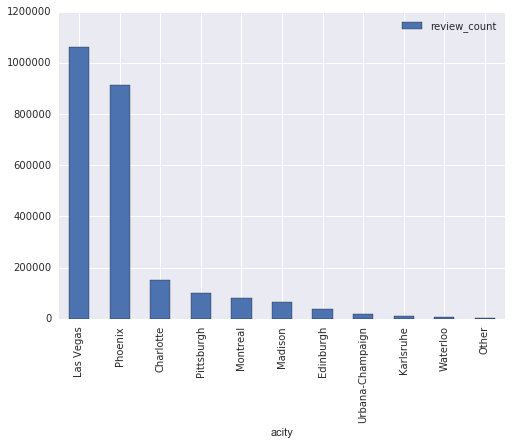

In [64]:
citywise_review_count.plot(x='acity',kind='bar')

In [99]:
review_count_distribution = b_df.groupby('review_count', {'count': gl.aggregate.COUNT('business_id')})

In [101]:
review_count_distribution['count'].sketch_summary()


+--------------------+---------------+----------+
|        item        |     value     | is exact |
+--------------------+---------------+----------+
|       Length       |      828      |   Yes    |
|        Min         |      1.0      |   Yes    |
|        Max         |    10784.0    |   Yes    |
|        Mean        | 93.5326086957 |   Yes    |
|        Sum         |    77445.0    |   Yes    |
|      Variance      |  361320.76826 |   Yes    |
| Standard Deviation | 601.099632557 |   Yes    |
|  # Missing Values  |       0       |   Yes    |
|  # unique values   |      142      |    No    |
+--------------------+---------------+----------+

Most frequent items:
+-------+-----+----+----+----+----+----+----+----+----+----+
| value |  1  | 2  | 3  | 4  | 6  | 5  | 7  | 10 | 11 | 13 |
+-------+-----+----+----+----+----+----+----+----+----+----+
| count | 304 | 98 | 49 | 48 | 28 | 21 | 17 | 14 | 12 | 9  |
+-------+-----+----+----+----+----+----+----+----+----+----+

Quantiles: 
+-----+--

### Categories

In [106]:
b_df.head(1)

Columns:
	attributes	dict
	business_id	str
	categories	list
	city	str
	full_address	str
	hours	dict
	latitude	float
	longitude	float
	name	str
	neighborhoods	list
	open	str
	review_count	int
	stars	float
	state	str
	type	str
	acity	str

Rows: 1

Data:
+-------------------------------+------------------------+
|           attributes          |      business_id       |
+-------------------------------+------------------------+
| {'Take-out': 'true', 'Driv... | 5UmKMjUEUNdYWqANhGckJw |
+-------------------------------+------------------------+
+--------------------------+------------+-------------------------------+
|        categories        |    city    |          full_address         |
+--------------------------+------------+-------------------------------+
| [Fast Food, Restaurants] | Dravosburg | 4734 Lebanon Church Rd\nDr... |
+--------------------------+------------+-------------------------------+
+-------------------------------+------------+-------------+-----------+---------------+
|             hours             |  latitude  |  longitude  |    name   | neighborhoods |
+-------------------------------+------------+-------------+-----------+---------------+
| {'Tuesday': {'close': '21:... | 40.3543266 | -79.9007057 | Mr Hoagie |       []      |
+-------------------------------+------------+-------------+-----------+---------------+
+------+--------------+-------+-------+----------+------------+
| open | review_count | stars | state |   type   |   acity    |
+------+--------------+-------+-------+----------+------------+
| true |      4       |  4.5  |   PA  | business | Pittsburgh |
+------+--------------+-------+-------+----------+------------+
[1 rows x 16 columns]

In [109]:
business_categories = b_df.flat_map(['business_id', 'category', 'city'],fn=lambda x: [[x['business_id'], y, x['acity']] for y in x['categories']])

In [111]:
business_categories.head(2)

business_id,category,city
5UmKMjUEUNdYWqANhGckJw,Fast Food,Pittsburgh
5UmKMjUEUNdYWqANhGckJw,Restaurants,Pittsburgh


In [116]:
business_categories['category'].sketch_summary()


+------------------+--------+----------+
|       item       | value  | is exact |
+------------------+--------+----------+
|      Length      | 227451 |   Yes    |
| # Missing Values |   0    |   Yes    |
| # unique values  |  897   |    No    |
+------------------+--------+----------+

Most frequent items:
+-------+-------------+----------+------+---------------+------------------+
| value | Restaurants | Shopping | Food | Beauty & Spas | Health & Medical |
+-------+-------------+----------+------+---------------+------------------+
| count |    25071    |  11233   | 9250 |      6583     |       5121       |
+-------+-------------+----------+------+---------------+------------------+
+-----------+---------------+------+------------+----------------+
| Nightlife | Home Services | Bars | Automotive | Local Services |
+-----------+---------------+------+------------+----------------+
|    5088   |      4785     | 4328 |    4208    |      3468      |
+-----------+---------------+------+-

In [115]:
# Number of categories/business on average
# Number of categories/business distribution
# Number of unique categories/city 

Canvas is accessible via web browser at the URL: http://localhost:57924/index.html
Opening Canvas in default web browser.


In [118]:
category_counts = business_categories.groupby('business_id', {'count':gl.aggregate.COUNT('category')})

In [120]:
category_counts['count'].sketch_summary()


+--------------------+---------------+----------+
|        item        |     value     | is exact |
+--------------------+---------------+----------+
|       Length       |     77185     |   Yes    |
|        Min         |      1.0      |   Yes    |
|        Max         |      10.0     |   Yes    |
|        Mean        | 2.94682904709 |   Yes    |
|        Sum         |    227451.0   |   Yes    |
|      Variance      | 1.34810891247 |   Yes    |
| Standard Deviation | 1.16108092417 |   Yes    |
|  # Missing Values  |       0       |   Yes    |
|  # unique values   |       10      |    No    |
+--------------------+---------------+----------+

Most frequent items:
+-------+-------+-------+-------+------+------+------+-----+----+---+----+
| value |   2   |   3   |   4   |  5   |  6   |  1   |  7  | 8  | 9 | 10 |
+-------+-------+-------+-------+------+------+------+-----+----+---+----+
| count | 35213 | 19760 | 12291 | 6228 | 2206 | 1048 | 368 | 60 | 9 | 2  |
+-------+-------+-------+--

In [131]:
business_categories.groupby('city', {'count_category':gl.aggregate.COUNT_DISTINCT('category'), 'tot_counts':gl.aggregate.COUNT('category')})

city,tot_counts,count_category
Las Vegas,61993,771
Edinburgh,9543,375
Phoenix,96423,804
Waterloo,1393,169
Other,563,152
Montreal,13558,402
Madison,8783,504
Urbana-Champaign,2177,290
Charlotte,19168,585
Karlsruhe,3063,297


In [134]:
# Finding frequent pairs
category_group_counts = b_df.groupby('categories', gl.aggregate.COUNT('categories'))

categories,Count
"[Seafood, Gastropubs,Restaurants] ...",1
"[Acupuncture, Day Spas,Massage Therapy, Heal ...",1
"[Pubs, Beer, Wine &Spirits, Bars, Food, ...",3
"[Food, Desserts,Restaurants, Tapas/Small ...",1
"[Security Systems, HomeServices, Home ...",1
"[German, Gastropubs,Restaurants] ...",1
"[Arts & Crafts, InteriorDesign, Shopping, ...",1
"[Food, Desserts, ShavedIce, Ice Cream & Frozen ...",14
"[Shopping, Home & Garden,Gift Shops, Appliances, ...",1
"[Burgers, Fast Food,Salad, Restaurants] ...",1


In [138]:
category_group_counts.to_dataframe().sort_values('Count', ascending=False)

,categories,Count
9553,"[Mexican, Restaurants]",1634
8603,"[Pizza, Restaurants]",1252
5163,"[Food, Coffee & Tea]",1123
1769,"[Beauty & Spas, Nail Salons]",1110
3571,"[Hotels & Travel, Event Planning & Services, H...",1061
5676,"[Hair Salons, Beauty & Spas]",997
9190,"[Chinese, Restaurants]",994
3834,"[Home Services, Real Estate, Apartments]",716
6030,"[Food, Grocery]",709
7045,"[Burgers, Fast Food, Restaurants]",697


In [140]:
# Most frequent categories
business_categories.groupby('category', gl.aggregate.COUNT('category')).to_dataframe().sort_values('Count', ascending=False)

,category,Count
125,Restaurants,25071
215,Shopping,11233
681,Food,9250
38,Beauty & Spas,6583
673,Health & Medical,5121
555,Nightlife,5088
377,Home Services,4785
683,Bars,4328
860,Automotive,4208
563,Local Services,3468


### Attributes type

In [144]:
ba_df = b_df.unpack('attributes')

In [154]:
attributes = filter(lambda x:x.startswith('attributes'), ba_df.column_names())
attributes = map(lambda x:x[11:], attributes)

In [156]:
attributes

['Accepts Credit Cards',
 'Accepts Insurance',
 'Ages Allowed',
 'Alcohol',
 'Ambience',
 'Attire',
 'BYOB',
 'BYOB/Corkage',
 'By Appointment Only',
 'Caters',
 'Coat Check',
 'Corkage',
 'Delivery',
 'Dietary Restrictions',
 'Dogs Allowed',
 'Drive-Thru',
 'Good For',
 'Good For Dancing',
 'Good For Groups',
 'Good for Kids',
 'Hair Types Specialized In',
 'Happy Hour',
 'Has TV',
 'Music',
 'Noise Level',
 'Open 24 Hours',
 'Order at Counter',
 'Outdoor Seating',
 'Parking',
 'Price Range',
 'Smoking',
 'Take-out',
 'Takes Reservations',
 'Waiter Service',
 'Wheelchair Accessible',
 'Wi-Fi']

In [175]:
b_df['attribute_count'] = b_df['attributes'].apply(lambda x: sum([y!='false' for y in x.values()]))

In [177]:
b_df['attribute_count'].sketch_summary()


+--------------------+---------------+----------+
|        item        |     value     | is exact |
+--------------------+---------------+----------+
|       Length       |     77445     |   Yes    |
|        Min         |      0.0      |   Yes    |
|        Max         |      24.0     |   Yes    |
|        Mean        | 5.84769836658 |   Yes    |
|        Sum         |    452875.0   |   Yes    |
|      Variance      | 34.5702705434 |   Yes    |
| Standard Deviation | 5.87964884525 |   Yes    |
|  # Missing Values  |       0       |   Yes    |
|  # unique values   |       25      |    No    |
+--------------------+---------------+----------+

Most frequent items:
+-------+-------+-------+-------+------+------+------+------+------+------+------+
| value |   0   |   1   |   3   |  4   |  14  |  5   |  15  |  13  |  2   |  16  |
+-------+-------+-------+-------+------+------+------+------+------+------+------+
| count | 13944 | 11620 | 10957 | 8237 | 3510 | 3305 | 3265 | 3172 | 2629 | 25

### Neighborhood distribution

In [179]:
b_df['neighborhoods'].sketch_summary()



+------------------+-------+----------+
|       item       | value | is exact |
+------------------+-------+----------+
|      Length      | 77445 |   Yes    |
| # Missing Values |   0   |   Yes    |
| # unique values  |  277  |    No    |
+------------------+-------+----------+

Most frequent items:
+-------+-------+--------------+---------------+---------------+--------------+
| value |   []  | ["Westside"] | ["The Strip"] | ["Southeast"] | ["Downtown"] |
+-------+-------+--------------+---------------+---------------+--------------+
| count | 46495 |     2203     |      2029     |      2025     |     1574     |
+-------+-------+--------------+---------------+---------------+--------------+
+-----------------+-------------------+--------------+------------------------+
| ["Ville-Marie"] | ["Spring Valley"] | ["Eastside"] | ["Plateau-Mont-Royal"] |
+-----------------+-------------------+--------------+------------------------+
|       1553      |        1552       |     1245     |   

In [10]:
b_df.groupby('acity', {"count_distinct":gl.aggregate.COUNT_DISTINCT('neighborhoods')})

acity,count_distinct
Las Vegas,39
Edinburgh,31
Phoenix,2
Waterloo,1
Other,30
Montreal,47
Madison,70
Urbana-Champaign,1
Charlotte,33
Karlsruhe,1


In [13]:
city_hood_counts = b_df.groupby(['acity','neighborhoods'], gl.aggregate.COUNT('neighborhoods')).to_dataframe().sort_values('Count', ascending=False)

In [14]:
city_hood_counts

,acity,neighborhoods,Count
114,Phoenix,[],32614
88,Las Vegas,[],5826
92,Charlotte,[],2735
179,Las Vegas,[Westside],2203
249,Las Vegas,[The Strip],2029
99,Las Vegas,[Southeast],2024
215,Montreal,[Ville-Marie],1553
9,Las Vegas,[Spring Valley],1552
260,Madison,[],1426
231,Las Vegas,[Eastside],1245


In [15]:
city_hood_counts[city_hood_counts['acity']=='Phoenix']

,acity,neighborhoods,Count
114,Phoenix,[],32614
130,Phoenix,[Southwest],1


In [22]:
a = b_df[(b_df['neighborhoods']==['Southwest'])]

In [23]:
a[a['acity']=='Phoenix']

Columns:
	attributes	dict
	business_id	str
	categories	list
	city	str
	full_address	str
	hours	dict
	latitude	float
	longitude	float
	name	str
	neighborhoods	list
	open	str
	review_count	int
	stars	float
	state	str
	type	str
	acity	str

Rows: Unknown

Data:
+---------------------------+------------------------+---------------+
|         attributes        |      business_id       |   categories  |
+---------------------------+------------------------+---------------+
| {'Good for Kids': 'true'} | yrkHElMMH-0SQ1BKvOZt9A | [Active Life] |
+---------------------------+------------------------+---------------+
+--------------+-------------------------------+-------+-----------+-------------+
|     city     |          full_address         | hours |  latitude |  longitude  |
+--------------+-------------------------------+-------+-----------+-------------+
| Grand Canyon | 5985 W Wigwam Ave\nSouthwe... |   {}  | 36.034699 | -115.224081 |
+--------------+-------------------------------+-------+-----------+-------------+
+----------------------+---------------+------+--------------+-------+-------+
|         name         | neighborhoods | open | review_count | stars | state |
+----------------------+---------------+------+--------------+-------+-------+
| Grand Canyon Skywalk |  [Southwest]  | true |      52      |  2.5  |   AZ  |
+----------------------+---------------+------+--------------+-------+-------+
+----------+---------+
|   type   |  acity  |
+----------+---------+
| business | Phoenix |
+----------+---------+
[? rows x 16 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.